# Logistic Regression

## Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

## Importar la data

In [3]:
cd = pd.read_csv("Datasets/CancerData.csv")
cd = cd[cd.columns[:-1]]

## Conocer la data

In [4]:
cd.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
cd.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Convertir data categorica en data númerica

In [7]:
cd['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [9]:
cd['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
diagnosis = {
    'B': 0,
    'M': 1
}
cd['diagnosis'] = cd['diagnosis'].map(diagnosis)

cd['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
cd.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Gráficar la data

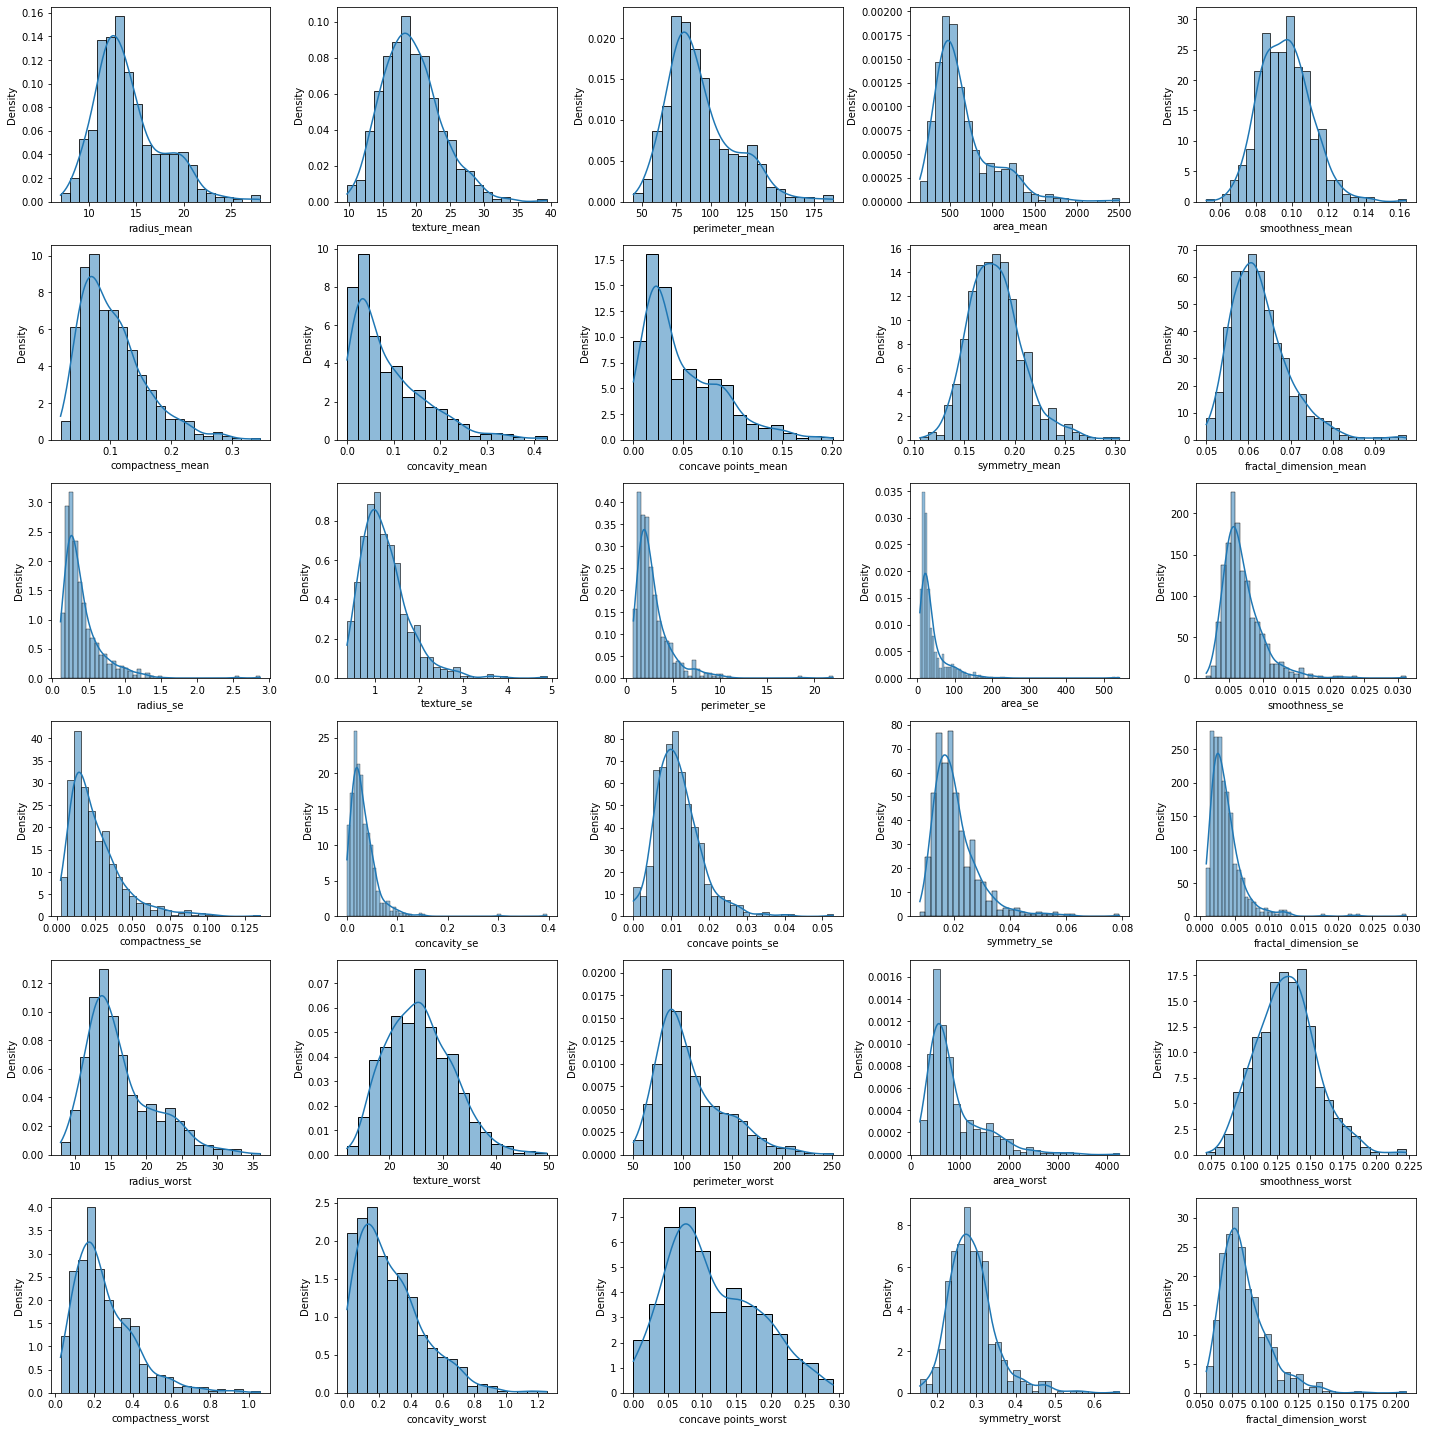

In [12]:
rows = 6
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))

col = cd.columns[2:]
index = 0

for i in range(rows):
    for j in range(cols):
        sns.histplot(cd[col[index]], ax=ax[i][j], kde=True, stat='density')
        index += 1

plt.tight_layout()

<AxesSubplot:xlabel='diagnosis', ylabel='Density'>

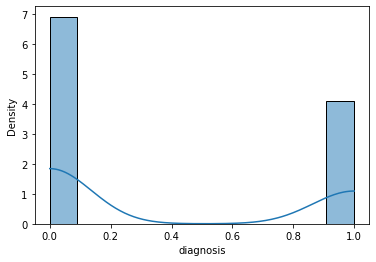

In [13]:
sns.histplot(cd['diagnosis'], kde=True, stat='density')

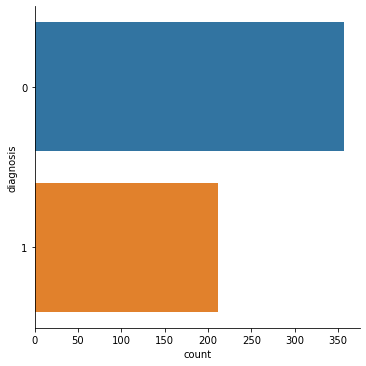

In [15]:
sns.catplot(y='diagnosis', data=cd, kind='count')

In [16]:
b = cd.query('diagnosis == 0').diagnosis.count()
m = cd.query('diagnosis == 1').diagnosis.count()
print('Benigno: ', b)
print('Maligno: ', m)

Benigno:  357
Maligno:  212


In [18]:
cd['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Datos de entrenamiento, validación y predicción - Regresión Logística

In [41]:
x = cd.drop(columns = ['diagnosis', 'id'])
y = cd['diagnosis']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape

(455, 30)

In [44]:
lr = LogisticRegression(solver='liblinear', max_iter=455)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=455, solver='liblinear')

In [45]:
y_pred = lr.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print('Exactitud: ' + str(100*accuracy) + '%')

Exactitud: 95.6140350877193%


In [46]:
lr.score(X_test, Y_test)

0.956140350877193

In [47]:
c_matrix = confusion_matrix(Y_test, y_pred)
print(c_matrix)

[[70  1]
 [ 4 39]]


In [48]:
group_names = ['True NEG', 'False POS', 'False NEG', 'True POS']
group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten()/np.sum(c_matrix)]

<AxesSubplot:>

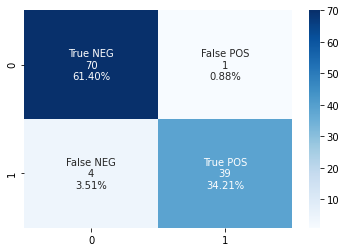

In [49]:
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

In [50]:
predicciones = pd.DataFrame({'Actual': Y_test, 'Predecido': y_pred})
predicciones

,Actual,Predecido
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
486,0,0
75,1,1
249,0,0
238,0,1


## Datos de entrenamiento, validación y predicción - Árboles de decisión

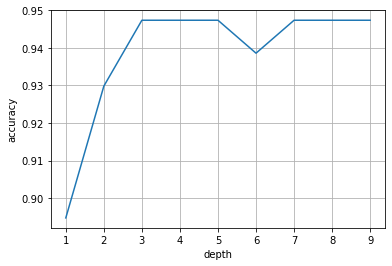

In [74]:
max_depth_lista = list(range(1, 10))

accuracy = []

for depth in max_depth_lista:
    arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=42)
    arbol_clas.fit(X_train, Y_train)
    score = arbol_clas.score(X_test, Y_test)
    accuracy.append(score)

plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [75]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)

In [76]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [77]:
y_pred = dtc.predict(X_test)

In [78]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [79]:
print(confusion_matrix(Y_test, y_pred))

[[69  2]
 [ 4 39]]


In [80]:
print('Test score: ', dtc.score(X_test, Y_test) * 100)

Test score:  94.73684210526315


In [81]:
print('Training score: ', dtc.score(X_train, Y_train) * 100)


Training score:  97.8021978021978
